## <center>sklearn库使用指南（模板）</center>
#### <center><strong>杨航锋</strong></center>
* [sklearn中文文档](http://sklearn.apachecn.org/#/)
* [sklean官方文档](https://scikit-learn.org/stable/)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn import naive_bayes
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [20]:
data.head()

,gender,age,TakeOutFrequency,dizzy,GastrointestinalDiscomfort,thirsty,,BeCrapulent,costive,NoSymptoms,HaveACold,clinic,SleepTime,ExerciseTime,VegetableDays,HealthSpending
0,0,3,1,0,1,0,0,0,0,0,1,1,2,2,4,1
1,0,4,0,0,0,1,0,0,1,0,1,2,1,1,3,1
2,0,4,1,1,1,1,1,0,0,0,3,2,2,1,3,1
3,0,4,1,0,1,0,0,0,0,0,2,2,2,1,4,1
4,0,4,0,0,0,0,0,0,1,0,1,1,2,5,4,1


In [38]:
data = pd.read_excel("决策树数据.xlsx")
labels = data["TakeOutFrequency"]
features = pd.concat([data.iloc[:, :2], data.iloc[:, 3:]], axis=1)

In [39]:
train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.2)

In [40]:
def plot(test_label, y_pred, model):
    font = {"color": "darkred",
            "size": 13, 
            "family" : "serif"}

    accs = accuracy_score(test_label, y_pred)
    fpr, tpr, _ = metrics.roc_curve(test_label,  y_pred)
    auc = metrics.roc_auc_score(test_label, y_pred)
    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, label="{}, auc=".format(model)+str(auc), color='green', linewidth=2)
    ax.set_title("ROC curve", fontdict=font)
    leg = ax.legend(loc="best")
    text = leg.get_texts()
    _ = plt.setp(text, color="blue") 

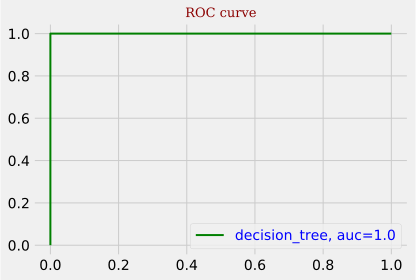

In [42]:
dt = DecisionTreeClassifier()
dt.fit(train_data, train_label)
y_pred = dt.predict(test_data)
plot(test_label, y_pred, "decision_tree")

In [43]:
target_names = ["class_0", "class_1"]
print(classification_report(y_pred, test_label, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        41
     class_1       1.00      1.00      1.00        77

   micro avg       1.00      1.00      1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



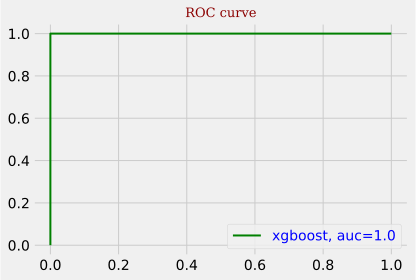

In [44]:
model = XGBClassifier()               
model.fit(train_data, train_label)            
y_pred = model.predict(test_data)
plot(test_label, y_pred, "xgboost")

In [45]:
target_names = ["class_0", "class_1"]
print(classification_report(y_pred, test_label, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        41
     class_1       1.00      1.00      1.00        77

   micro avg       1.00      1.00      1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



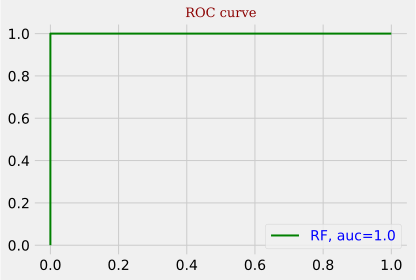

In [47]:
rcf = RandomForestClassifier(20)
rcf.fit(train_data, train_label)
y_pred = rcf.predict(test_data)
plot(test_label, y_pred, "RF")

In [48]:
target_names = ["class_0", "class_1"]
print(classification_report(y_pred, test_label, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        41
     class_1       1.00      1.00      1.00        77

   micro avg       1.00      1.00      1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



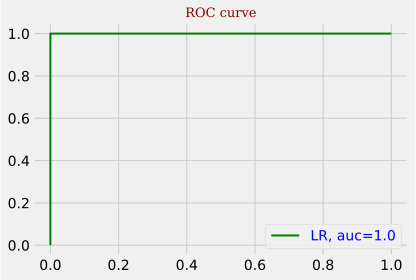

In [51]:
lr = LogisticRegression(solver="lbfgs")
lr.fit(train_data, train_label)
y_pred = lr.predict(test_data)
plot(test_label, y_pred, "LR")

In [52]:
target_names = ["class_0", "class_1"]
print(classification_report(y_pred, test_label, target_names=target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        41
     class_1       1.00      1.00      1.00        77

   micro avg       1.00      1.00      1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



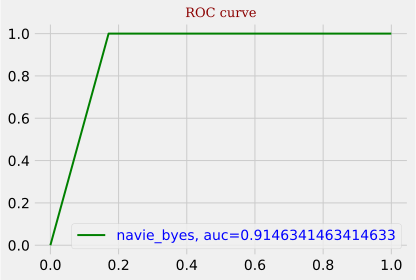

In [53]:
nb = naive_bayes.MultinomialNB()
nb.fit(train_data, train_label)
y_pred = nb.predict(test_data)
plot(test_label, y_pred, "navie_byes")

In [54]:
target_names = ["class_0", "class_1"]
print(classification_report(y_pred, test_label, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.83      1.00      0.91        34
     class_1       1.00      0.92      0.96        84

   micro avg       0.94      0.94      0.94       118
   macro avg       0.91      0.96      0.93       118
weighted avg       0.95      0.94      0.94       118



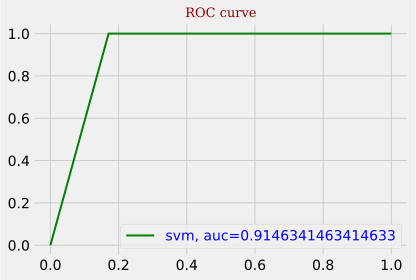

In [60]:
svm = LinearSVC()
svm.fit(train_data, train_label)
y_pred = nb.predict(test_data)
plot(test_label, y_pred, "svm")

In [61]:
target_names = ["class_0", "class_1"]
print(classification_report(y_pred, test_label, target_names=target_names))

              precision    recall  f1-score   support

     class_0       0.83      1.00      0.91        34
     class_1       1.00      0.92      0.96        84

   micro avg       0.94      0.94      0.94       118
   macro avg       0.91      0.96      0.93       118
weighted avg       0.95      0.94      0.94       118

